# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

For working through this notebook, you are expected to have a very basic understanding of:
* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [21]:
medical.shape

(1338, 8)

In [22]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


<div class="alert alert-block alert-info">
    <b> Q: </b> Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.
</div>

__A:__

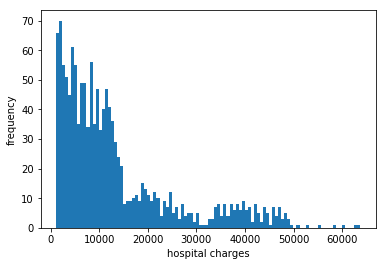

In [23]:
_ = plt.hist(medical['charges'], bins=100)
_ = plt.xlabel('hospital charges')
_ = plt.ylabel('frequency')
plt.show()

In [24]:
charges_mean = np.mean(medical['charges'])
charges_std = np.std(medical['charges'])

print('mean charge:', charges_mean)
print('std dev of charges:', charges_std)

mean charge: 13270.422265141257
std dev of charges: 12105.484975561612


It is not necessarily appropriate to use the mean and standard deviation as statistics for this data because it is not close to a normal distribution. It is severely skewed to the right with a long tail.

<div class="alert alert-block alert-info">
    <b>Q:</b> The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed above, to apply?
</div>

__A:__ Assuming the sampling is random and there is a large sample size, we can assume that the real distribution is similar to the sample distribution- not normal and skewed to the right. From the distribution of charges, it appears that there are clusters of different types of charges and as long as this distribution stays more or less constant over time, using the average charge as a gauge for how the operational model is faring, is reasonable. The average charge is above 12000 but we might also compare that to the median charge, and see that the median has fallen below 12,000, the administrator's critical threshold.

In this case, using a t-statistic is appropriate since we do not have the population standard deviation.

In [25]:
charges_med = np.median(medical['charges'])
print('median charge:', charges_med)

median charge: 9382.033


<div class="alert alert-block alert-info">
    <b>Q:</b> Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?
</div>

__A:__ <br>
Null hypothesis, $H_{0}$: hospital finances are fine <br>
Alternative hypothesis, $H_{a}$: hospital finances are threatened, mean charge < 12000

This is a one-tailed test since we only care whether or not the average charge is below a certain threshold.

The t value is:

$t = \frac{x-\mu_{0}}{s/\sqrt{n}}$

In [26]:
x = 12000
n = 1338
t = (x-charges_mean)/(charges_std/np.sqrt(n))
print('t:', t)

t: -3.8387865119014744


In [27]:
# 95% confidence interval for one tailed test
# find range for 50% above mean, 45% below mean t = -1.646

lower_limit = charges_mean - 1.64*(charges_std/np.sqrt(n))
print('lower limit:', lower_limit)

lower limit: 12727.674574335279


The 95% confidence interval of the population mean is 12727.67 to infinity, therefore the administrator does not need to be concerned with the hospital's finances if the threshold is 12000.

<div class="alert alert-block alert-info">
The administrator then wants to know whether people with insurance really are charged a different amount to those without.

<b>Q:</b> State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption, or assumptions, are we making here?
</div>

__A:__ <br>
Null hypothesis, $H_{0}$: People with insurance are charged the same amount as those without insurance,  $mean_{diff} = 0$. <br>
Alternative hypothesis, $H_{a}$: People with insurance are charged a different amount from those without insurance,  $mean_{diff} \neq 0$. <br>

We are assuming both distributions (charges for insured and uninsured) are normal.

In [46]:
# Insured; people with insurance
insured_charges = medical[medical['insuranceclaim']==1]['charges']

n_ins = insured_charges.count()
mean_ins = np.mean(insured_charges)
std_ins = np.std(insured_charges)

print('number of people insured:', n_ins)
print('mean charges for insured:', mean_ins)
print('std dev of charges for insured:', std_ins)

# Uninsured; people without insurance
uninsured_charges = medical[medical['insuranceclaim']==0]['charges']

n_unins = uninsured_charges.count()
mean_unins = np.mean(uninsured_charges)
std_unins = np.std(uninsured_charges)

print('number of people uninsured:', n_unins)
print('mean charges for uninsured:', mean_unins)
print('std dev of charges for uninsured:', std_unins)

number of people insured: 783
mean charges for insured: 16423.928276537677
std dev of charges for insured: 14036.956250260417
number of people uninsured: 555
mean charges for uninsured: 8821.421892306305
std dev of charges for uninsured: 6440.699841605235


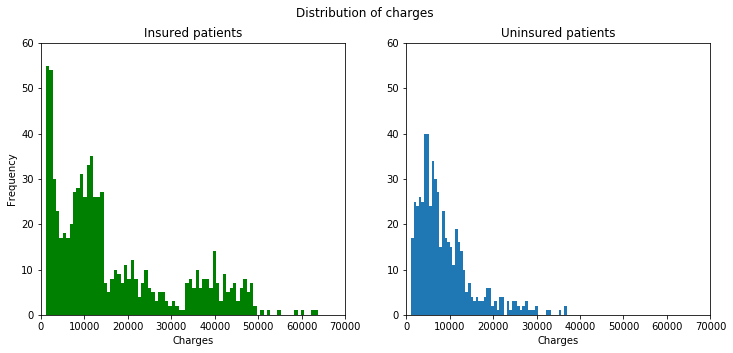

In [52]:
_ = plt.figure(1, figsize=(12,5))
_ = plt.suptitle('Distribution of charges')
_ = plt.subplot(121)
_ = plt.hist(insured_charges, bins=80, color='g')
_ = plt.title('Insured patients')
_ = plt.xlim(0,70000)
_ = plt.ylim(0, 60)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency')

_ = plt.subplot(122)
_ = plt.hist(uninsured_charges, bins=60)
_ = plt.title('Uninsured patients')
_ = plt.xlim(0,70000)
_ = plt.ylim(0, 60)
_ = plt.xlabel('Charges')

plt.show()

<div class="alert alert-block alert-info">
    <b>Q:</b> Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.
</div>

__A:__ 

#### Manual calculation

p value is the probability of obtaining a value at least as extreme as our observed mean difference, assuming the null hypothesis (insured and uninsured are charged the same amount) is true. We'll test for a significance level of $\alpha$ = 0.05.

In [70]:
s_p = np.sqrt(((n_ins-1)*std_ins**2 + (n_unins-1)*std_unins**2)/(n_ins+n_unins-2))
t = ((mean_ins-mean_unins)/(s_p*np.sqrt(1/n_ins + 1/n_unins)))

print('pooled std dev:', s_p)
print('t:', t)

pooled std dev: 11512.282899205748
t value: 11.901306943555388


Given the large t value, we expect the p value to be extremely small, essentially zero. Since the p-value is less than our $\alpha$, we reject the null hypothesis in favor of the alternative hypothesis that insured patients are charged a different amount from uninsured patients.

#### scipy.stats calculation

In [91]:
t_stats, p_stats = stats.ttest_ind(insured_charges.values, uninsured_charges.values)
print('t:', t_stats)
print('p value:', p_stats)

t: 11.893299030876712
p value: 4.461230231620717e-31


We can use the [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to get the same result as the manual calculation, however, this method assumes that the variances of the two sample populations have the same variance (i.e. using the pooled variance). In this case, the end result does not change, but ideally we would not assume that the variances are the same. We'd include equal_var = False in ttest_ind.

In [92]:
stats.ttest_ind(insured_charges.values, uninsured_charges.values, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and that is much easier to use. All you need to do is pass it your data.

<div class="alert alert-block alert-info">
    <b>Q:</b> In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.
</div>

__A:__

In [93]:
t2, p2 = stats.ttest_ind(insured_charges.values, uninsured_charges.values, equal_var=False)
print('t:', t2)
print('p value:', p2)

t: 13.298031957975649
p value: 1.1105103216309125e-37


<div class="alert alert-block alert-info">
    <b>Q:</b> Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.
</div>

__A:__

## Learning outcomes

Having completed this project notebook, you have good hands-on experience of
* how you can use the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* how to then perform inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test